# Principal Component Analysis

In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
print(cancer.DESCR)

In [8]:
print(len(cancer.data[cancer.target==1]))

357


# Distribution of Variables

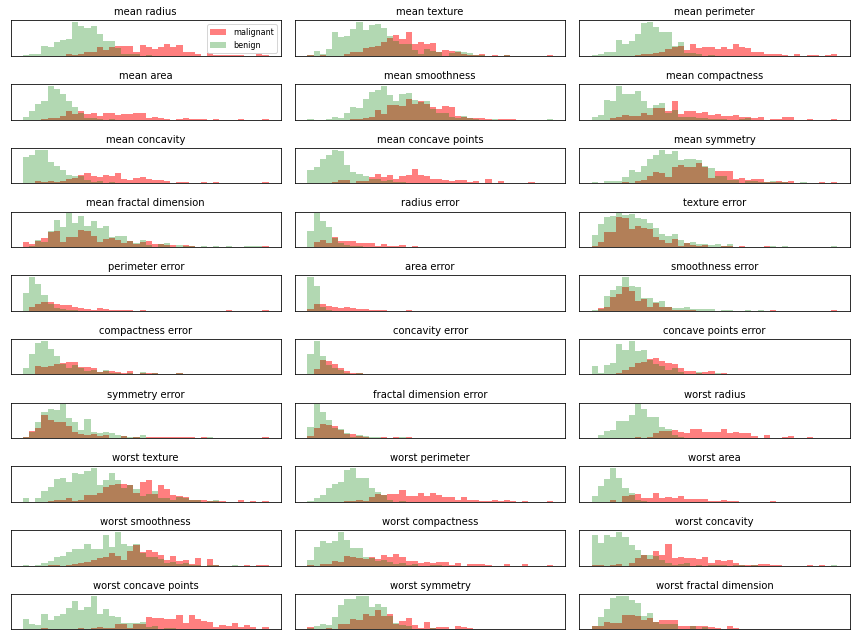

In [26]:
fig, axes = plt.subplots(10, 3, figsize=(12, 9)) # 10 rows 3 columns
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins=40)
    ax[i].hist(malignant[:,i], bins=bins, color='r', alpha=0.5) # red color for malignant
    ax[i].hist(benign[:,i], bins=bins, color='g', alpha=0.3) # green color for benign. alpha is for tranparency in the overlapped region
    ax[i].set_title(cancer.feature_names[i], fontsize=10)
    ax[i].axes.get_xaxis().set_visible(False)
    ax[i].set_yticks(())
ax[0].legend(['malignant', 'benign'], fontsize=8)
plt.tight_layout() # for good layout
plt.show()

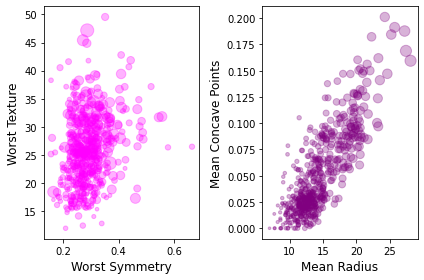

In [32]:
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)  # convert scikit learn dataset into pandas datframe
plt.subplot(1,2,1) # first plot
plt.scatter(cancer_df['worst symmetry'], cancer_df['worst texture'], s=cancer_df['worst area']*0.05, color='magenta', label='check', alpha=0.3)
plt.xlabel('Worst Symmetry',fontsize=12)
plt.ylabel('Worst Texture',fontsize=12)
plt.subplot(1,2,2)
plt.scatter(cancer_df['mean radius'], cancer_df['mean concave points'], s=cancer_df['mean area']*0.05, color='purple', label='check', alpha=0.3)
plt.xlabel('Mean Radius',fontsize=12)
plt.ylabel('Mean Concave Points',fontsize=12)
plt.tight_layout()
plt.show()

# Feature Scaling

In [40]:
scaler = StandardScaler()  # instantiate
scaler.fit(cancer.data) # computes the mean and standard deviation
X_scaled = scaler.transform(cancer.data)
# checking minimum after scaling
print ("after scaling minimum", X_scaled.min(axis=0))

after scaling minimum [-2.0296483  -2.22924851 -1.98450403 -1.45444309 -3.11208479 -1.61013634
 -1.11487284 -1.26181958 -2.74411707 -1.81986478 -1.05992413 -1.55426392
 -1.04404888 -0.73782907 -1.77606498 -1.2980982  -1.05750068 -1.91344745
 -1.53289003 -1.09696818 -1.72690052 -2.22399401 -1.69336103 -1.22242284
 -2.68269492 -1.4438784  -1.30583065 -1.74506282 -2.16095969 -1.60183949]


In [45]:
# total features
len(cancer_df.columns)

30

# PCA for dimension reduction

In [47]:
pca = PCA(n_components=3)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
# let's check the size of dataframe after applying pca
X_pca.shape

(569, 3)

# Variation covered by the components

In [58]:
ex_variance = np.var(X_pca, axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance)
print(ex_variance_ratio)

[13.28160768  5.69135461  2.81794898]
[0.60950217 0.2611802  0.12931763]


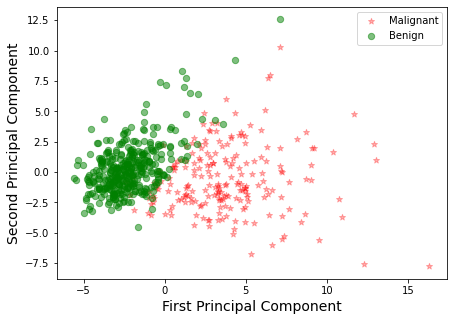

In [53]:
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=cancer.target
cdict={0:'red',1:'green'}
labl={0:'Malignant',1:'Benign'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
 ix=np.where(labels==l)
 ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,
           label=labl[l],marker=marker[l],alpha=alpha[l])
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()
# please check the scatter plot of the remaining component and you will understand the difference

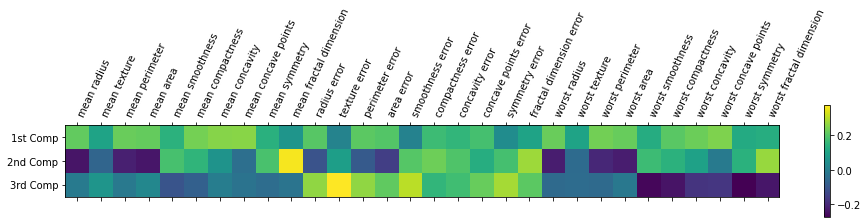

In [54]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=65,ha='left')
plt.tight_layout()
plt.show()